In [1]:
import json
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import rcParams
import sys
np.set_printoptions(threshold=sys.maxsize)
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12


In [2]:
moldir = "/Users/jfoley19/Code/data_repository/Mapol/HHep/"
# json file name
# uncc mac
filedz =moldir + "HHe+_lambda_qed-fci_cc-pVDZ_photon_number_basis_10_omega_0.976056825139936.json"
filetz =moldir + "HHe+_lambda_qed-fci_cc-pVTZ_photon_number_basis_10_omega_0.9654959009.json"
fileqz =moldir + "HHe+_lambda_qed-fci_cc-pVQZ_photon_number_basis_10_omega_0.9637811053.json"


rdz = moldir + "HHe+_cc-pVDZ_PCQED_10_0.9760568251_new.json"
rtz = moldir + "HHe+_cc-pVTZ_PCQED_10_0.9654959009.json"
rqz = moldir + "HHe+_lambda_PCQED_cc-pVQZ_photon_number_basis_10_omega_0.9637811053.json"

rdz_2 = moldir + "HHe+_cc-pVDZ_PCQED_lambda_0dot1_10_0.9760568251.json"
rtz_2 = moldir + "HHe+_cc-pVTZ_PCQED_lambda_0dot1_10_0.9654959009.json"

# Ruby's DZ data
rdzdata = json.load(open(rdz))
r_energydz = np.array(rdzdata["return_result"])
rl_array = np.array(rdzdata["lambda"])

rdzdata_2 = json.load(open(rdz_2))
r_energydz_2 = np.array(rdzdata_2["return_result"])
rl_array_2 = np.array(rdzdata_2["lambda"])

# Ruby's TZ data
rtzdata = json.load(open(rtz))
r_energytz = np.array(rtzdata["return_result"])

rtzdata_2 = json.load(open(rtz_2))
r_energytz_2 = np.array(rtzdata_2["return_result"])

# Ruby'z QZ data
rqzdata = json.load(open(rqz))
r_energyqz = np.array(rqzdata["return_result"])


# QED-FCI DZ data
datadz = json.load(open(filedz))
energydz = np.array(datadz["return_result"])
l_arraydz = np.array(datadz['model']['lambda'])

# QED-FCI TZ data
datatz = json.load(open(filetz))
energytz = np.array(datatz["return_result"])
l_arraytz = np.array(datatz['model']['lambda'])

# QED-FCI QZ data
dataqz = json.load(open(fileqz))
energyqz = np.array(dataqz["return_result"])
l_arrayqz = np.array(dataqz['model']['lambda'])


#data = json.load(open(file))
#energy = np.array(data["return_result"])
#l_array = np.array(data['model']['lambda'])
#print(datadz)
N_l = len(l_arrayqz)
for i in range(10):
    val = energyqz[N_l-1,i]
    print(F' {val:16.10e},')
    

 -2.9752836146e+00,
 -2.1821426646e+00,
 -2.0662453981e+00,
 -1.9544622822e+00,
 -1.7645286249e+00,
 -1.7237188449e+00,
 -1.7237188449e+00,
 -1.7137228813e+00,
 -1.6567628255e+00,
 -1.6567628255e+00,


In [3]:
N = len(r_energydz_2[:,0])-1

# store dz g, lp, and up data
rdz_g = np.concatenate((r_energydz[:,0],r_energydz_2[:N,0]), axis=0)
rdz_lp = np.concatenate((r_energydz[:,2],r_energydz_2[:N,2]), axis=0)
rdz_up = np.concatenate((r_energydz[:,3],r_energydz_2[:N,3]), axis=0)

# store tz g, lp, and up data
rtz_g = np.concatenate((r_energytz[:,0],r_energytz_2[:N,0]), axis=0)
rtz_lp = np.concatenate((r_energytz[:,2],r_energytz_2[:N,2]), axis=0)
rtz_up = np.concatenate((r_energytz[:,3],r_energytz_2[:N,3]), axis=0)

# store qz g, lp, and up data
rqz_g = np.copy(r_energyqz[:,0])
rqz_lp = np.copy(r_energyqz[:,2])
rqz_up = np.copy(r_energyqz[:,3]) 

N_qz = len(rqz_g)

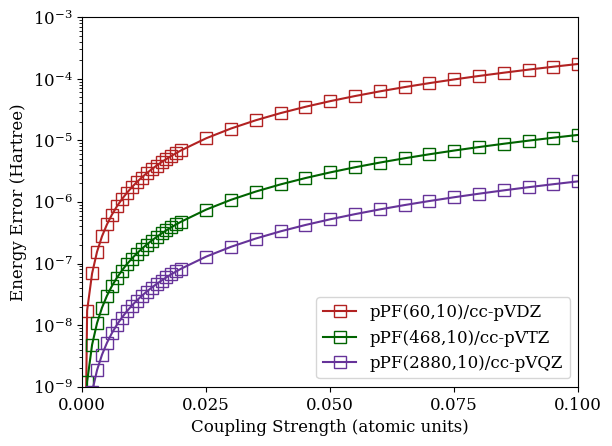

In [4]:
COLOUR1 = "firebrick"
COLOUR2 = "darkgreen"
COLOUR3 = "royalblue"
COLOUR4 = "rebeccapurple"
COLOUR5 = 'darkorchid'
COLOUR6 = 'olivedrab'

#plt.plot(lamarray, (triplet_state_6-E_min) * 27.2114, color="black",  marker="o", ms="8", label="E$_{^3 T}$")
#plt.plot(lamarray, (singlet_state_7-E_min) * 27.2114, color="red",  marker="o", ms="8", label="E$_{LP}$")
#plt.plot(lamarray, (singlet_state_8-E_min) * 27.2114, color="blue",  marker="o", ms="8",label="E$_{UP}$")
#plt.plot(l_array[:,2], energy[:,0])
plt.plot(l_arraydz[:,2], (energydz[:,0]-rdz_g) * 1, color=COLOUR1, marker="s", ms="8", mfc="none", label="pPF(60,10)/cc-pVDZ")
plt.plot(l_arraydz[:,2], (energytz[:,0]-rtz_g) * 1, color=COLOUR2, marker="s", ms="8", mfc="none", label="pPF(468,10)/cc-pVTZ")
plt.plot(l_arraydz[:,2], (energyqz[:,0]-rqz_g) * 1, color=COLOUR4, marker="s", ms="8", mfc="none", label="pPF(2880,10)/cc-pVQZ")
plt.yscale("log")
plt.xlabel("Coupling Strength (atomic units)")
plt.ylabel("Energy Error (Hartree)")
plt.xticks([0, 0.025, 0.050, 0.075, 0.100])
plt.xlim(0.00, 0.1)
plt.ylim(1e-9, 1e-3)
plt.legend()
plt.savefig("HHep_Error_vs_Coupling.png", dpi=200)
plt.show()


<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
/var/folders/5f/ftf5xlgj4dv_6xxqh_p9pwyc0000gq/T/ipykernel_22050/1658194857.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel("E$_g$($\lambda$) - E$_g$(0) (eV)")


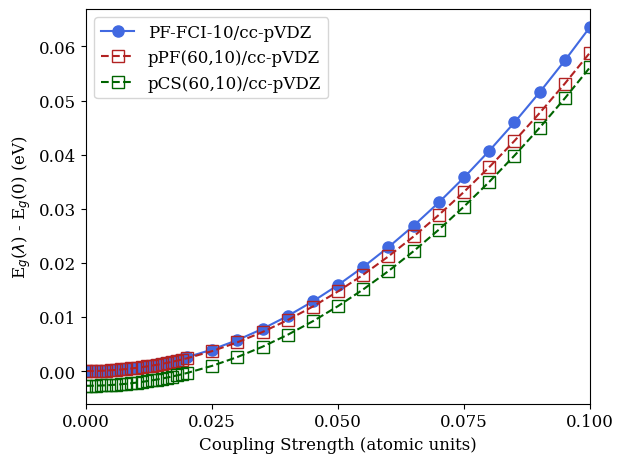

In [5]:
plt.plot(l_arraydz[:,2], (energydz[:,0]-energydz[0,0]) * 27.2114, color=COLOUR3, linestyle="solid", marker="o", ms="8", mfc=COLOUR3, label="PF-FCI-10/cc-pVDZ")
plt.plot(l_arraydz[:,2], (rdz_g-rdz_g[0]) * 27.2114, color=COLOUR1, linestyle="dashed", marker="s", ms="8", mfc="none", label="pPF(60,10)/cc-pVDZ")
plt.plot(l_arraydz[:,2], (rdz_g-rdz_g[0]-0.0001) * 27.2114, color=COLOUR2, linestyle="dashed", marker="s", ms="8", mfc="none", label="pCS(60,10)/cc-pVDZ")
plt.xticks([0, 0.025, 0.050, 0.075, 0.100])
plt.xlim(0.00, 0.1)
plt.xlabel("Coupling Strength (atomic units)")
plt.ylabel("E$_g$($\lambda$) - E$_g$(0) (eV)")
plt.tight_layout()
plt.legend()
#plt.savefig("HHep_Ground_State_cc_pVDZ.png", dpi=200)
plt.show()


<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:17: SyntaxWarning: invalid escape sequence '\l'
<>:29: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:17: SyntaxWarning: invalid escape sequence '\l'
<>:29: SyntaxWarning: invalid escape sequence '\l'
/var/folders/5f/ftf5xlgj4dv_6xxqh_p9pwyc0000gq/T/ipykernel_22050/731639605.py:6: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel("E$_g$($\lambda$) - E$_g$(0) (eV)")
/var/folders/5f/ftf5xlgj4dv_6xxqh_p9pwyc0000gq/T/ipykernel_22050/731639605.py:17: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel("E$_g$($\lambda$) - E$_g$(0) (eV)")
/var/folders/5f/ftf5xlgj4dv_6xxqh_p9pwyc0000gq/T/ipykernel_22050/731639605.py:29: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel("E$_g$($\lambda$) - E$_g$(0) (eV)")


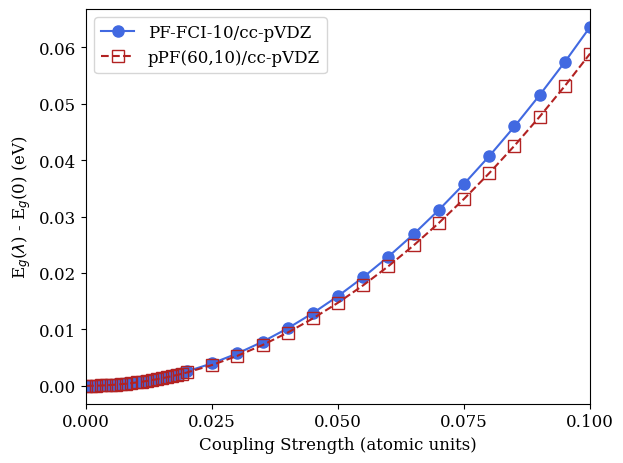

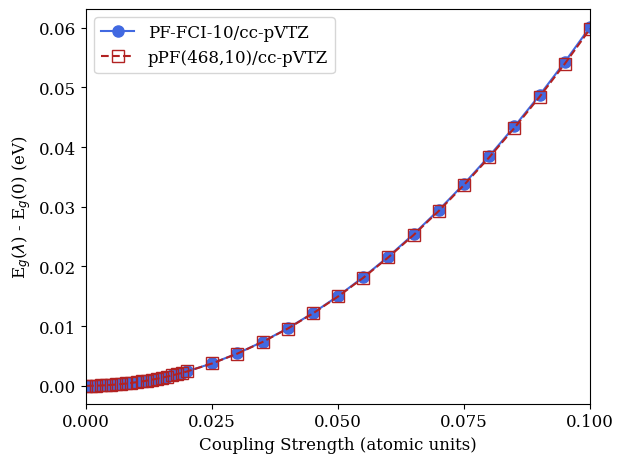

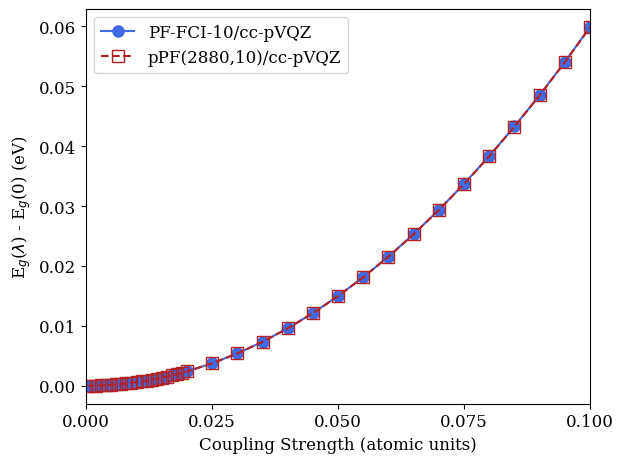

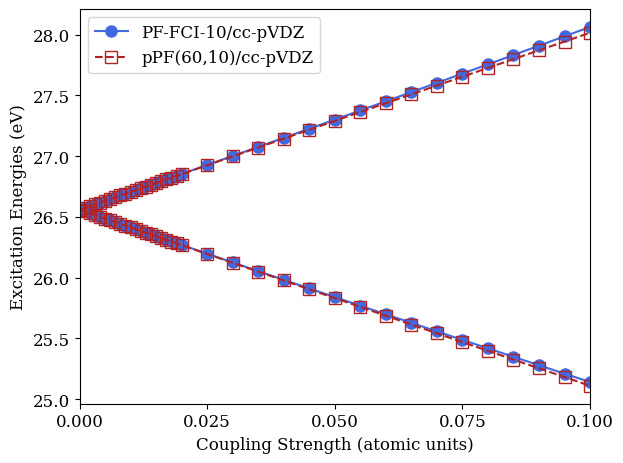

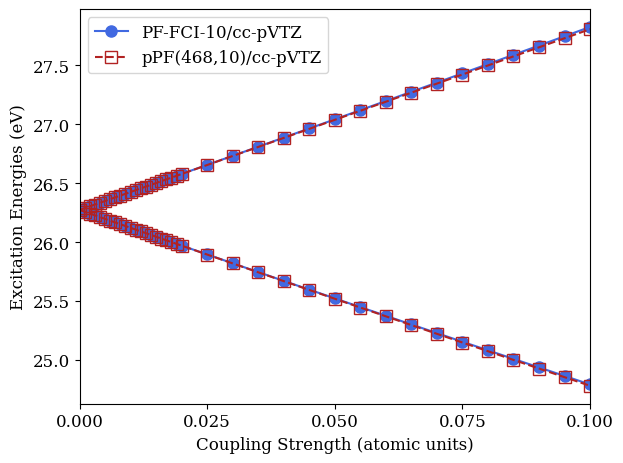

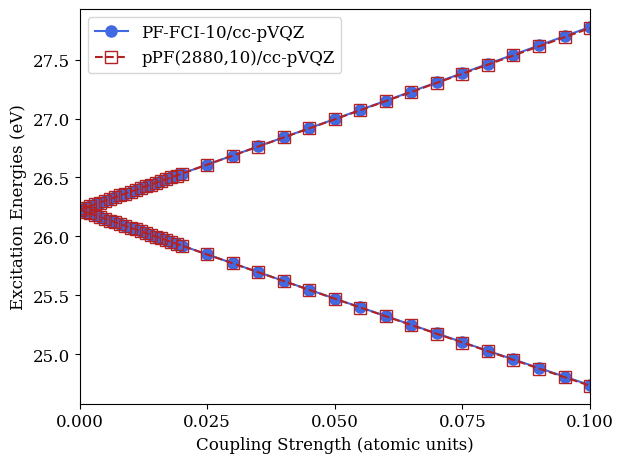

In [6]:
plt.plot(l_arraydz[:,2], (energydz[:,0]-energydz[0,0]) * 27.2114, color=COLOUR3, linestyle="solid", marker="o", ms="8", mfc=COLOUR3, label="PF-FCI-10/cc-pVDZ")
plt.plot(l_arraydz[:,2], (rdz_g-rdz_g[0]) * 27.2114, color=COLOUR1, linestyle="dashed", marker="s", ms="8", mfc="none", label="pPF(60,10)/cc-pVDZ")
plt.xticks([0, 0.025, 0.050, 0.075, 0.100])
plt.xlim(0.00, 0.1)
plt.xlabel("Coupling Strength (atomic units)")
plt.ylabel("E$_g$($\lambda$) - E$_g$(0) (eV)")
plt.tight_layout()
plt.legend()
#plt.savefig("HHep_Ground_State_cc_pVDZ.png", dpi=200)
plt.show()

plt.plot(l_arraydz[:,2], (energytz[:,0]-energytz[0,0]) * 27.2114, color=COLOUR3, linestyle="solid", marker="o", ms="8", mfc=COLOUR3, label="PF-FCI-10/cc-pVTZ")
plt.plot(l_arraydz[:,2], (rtz_g-rtz_g[0]) * 27.2114, color=COLOUR1, linestyle="dashed", marker="s", ms="8", mfc="none", label="pPF(468,10)/cc-pVTZ")
plt.xticks([0, 0.025, 0.050, 0.075, 0.100])
plt.xlim(0.00, 0.1)
plt.xlabel("Coupling Strength (atomic units)")
plt.ylabel("E$_g$($\lambda$) - E$_g$(0) (eV)")
plt.tight_layout()
plt.legend()
plt.savefig("HHep_Ground_State_cc_pVTZ.png", dpi=200)
plt.show()


plt.plot(l_arraydz[:,2], (energyqz[:,0]-energyqz[0,0]) * 27.2114, color=COLOUR3, linestyle="solid", marker="o", ms="8", mfc=COLOUR3, label="PF-FCI-10/cc-pVQZ")
plt.plot(l_arraydz[:,2], (rqz_g-rqz_g[0]) * 27.2114, color=COLOUR1, linestyle="dashed", marker="s", ms="8", mfc="none", label="pPF(2880,10)/cc-pVQZ")
plt.xticks([0, 0.025, 0.050, 0.075, 0.100])
plt.xlim(0.00, 0.1)
plt.xlabel("Coupling Strength (atomic units)")
plt.ylabel("E$_g$($\lambda$) - E$_g$(0) (eV)")
plt.tight_layout()
plt.legend()
plt.savefig("HHep_Ground_State_cc_pVQZ.png", dpi=200)
plt.show()


plt.plot(l_arraydz[:,2], (energydz[:,2]-energydz[:,0]) * 27.2114, color=COLOUR3, linestyle="solid", marker="o", ms="8", mfc=COLOUR3, label="PF-FCI-10/cc-pVDZ")
plt.plot(l_arraydz[:,2], (energydz[:,3]-energydz[:,0]) * 27.2114, color=COLOUR3, linestyle="solid", marker="o", ms="8", mfc=COLOUR3)
plt.plot(l_arraydz[:,2], (rdz_lp-rdz_g) * 27.2114, color=COLOUR1, linestyle="dashed", marker="s", ms="8", mfc="none", label="pPF(60,10)/cc-pVDZ")
plt.plot(l_arraydz[:,2], (rdz_up-rdz_g) * 27.2114, color=COLOUR1, linestyle="dashed", marker="s", ms="8", mfc="none")
plt.xticks([0, 0.025, 0.050, 0.075, 0.100])
plt.xlim(0.00, 0.1)
plt.xlabel("Coupling Strength (atomic units)")
plt.ylabel("Excitation Energies (eV)")
plt.tight_layout()
plt.legend()
plt.savefig("HHep_Polariton_Energies_cc-pVDZ.png", dpi=200)
plt.show()

plt.plot(l_arraydz[:,2], (energytz[:,2]-energytz[:,0]) * 27.2114, color=COLOUR3, linestyle="solid", marker="o", ms="8", mfc=COLOUR3, label="PF-FCI-10/cc-pVTZ")
plt.plot(l_arraydz[:,2], (energytz[:,3]-energytz[:,0]) * 27.2114, color=COLOUR3, linestyle="solid", marker="o", ms="8", mfc=COLOUR3)
plt.plot(l_arraydz[:,2], (rtz_lp-rtz_g) * 27.2114, color=COLOUR1, linestyle="dashed", marker="s", ms="8", mfc="none", label="pPF(468,10)/cc-pVTZ")
plt.plot(l_arraydz[:,2], (rtz_up-rtz_g) * 27.2114, color=COLOUR1, linestyle="dashed", marker="s", ms="8", mfc="none")
plt.xticks([0, 0.025, 0.050, 0.075, 0.100])
plt.xlim(0.00, 0.1)
plt.xlabel("Coupling Strength (atomic units)")
plt.ylabel("Excitation Energies (eV)")
plt.tight_layout()
plt.legend()
plt.savefig("HHep_Polariton_Energies_cc-pVTZ.png", dpi=200)
plt.show()

plt.plot(l_arraydz[:,2], (energyqz[:,2]-energyqz[:,0]) * 27.2114, color=COLOUR3, linestyle="solid", marker="o", ms="8", mfc=COLOUR3, label="PF-FCI-10/cc-pVQZ")
plt.plot(l_arraydz[:,2], (energyqz[:,3]-energyqz[:,0]) * 27.2114, color=COLOUR3, linestyle="solid", marker="o", ms="8", mfc=COLOUR3)
plt.plot(l_arraydz[:,2], (rqz_lp-rqz_g) * 27.2114, color=COLOUR1, linestyle="dashed", marker="s", ms="8", mfc="none", label="pPF(2880,10)/cc-pVQZ")
plt.plot(l_arraydz[:,2], (rqz_up-rqz_g) * 27.2114, color=COLOUR1, linestyle="dashed", marker="s", ms="8", mfc="none")
plt.xticks([0, 0.025, 0.050, 0.075, 0.100])
plt.xlim(0.00, 0.1)
plt.xlabel("Coupling Strength (atomic units)")
plt.ylabel("Excitation Energies (eV)")
plt.tight_layout()
plt.legend()
plt.savefig("HHep_Polariton_Energies_cc-pVQZ.png", dpi=200)
plt.show()

# Sorting polariton states for the Coherent-State QED-CAS(6,14) method

print(energy)

In [ ]:
[[-2.96082056 -2.16533574 -1.98476373 -1.98476373 -1.64762091 -1.58323414
  -1.18927892 -1.12366468 -1.12366468 -1.09549003]
 [-2.96082032 -2.16533538 -1.98530017 -1.98422651 -1.64762018 -1.58323316
  -1.18927881 -1.1236644  -1.1236644  -1.09548998]
 [-2.96081962 -2.1653343  -1.98583582 -1.98368852 -1.64761799 -1.58323022
  -1.1892785  -1.12366356 -1.12366356 -1.09548985]
 [-2.96081845 -2.1653325  -1.98637069 -1.98314974 -1.64761435 -1.58322532
  -1.18927797 -1.12366216 -1.12366216 -1.09548963]
 [-2.96081681 -2.16532999 -1.98690479 -1.98261018 -1.64760924 -1.58321846
  -1.18927724 -1.1236602  -1.1236602  -1.09548932]
 [-2.96081471 -2.16532675 -1.9874381  -1.98206984 -1.64760268 -1.58320964
  -1.18927629 -1.12365768 -1.12365768 -1.09548892]
 [-2.96081213 -2.16532279 -1.98797063 -1.98152871 -1.64759466 -1.58319886
  -1.18927513 -1.12365459 -1.12365459 -1.09548844]
 [-2.96080909 -2.16531811 -1.98850239 -1.98098681 -1.64758518 -1.58318612
  -1.18927377 -1.12365095 -1.12365095 -1.09548787]
 [-2.96080559 -2.16531272 -1.98903336 -1.98044412 -1.64757425 -1.58317143
  -1.18927219 -1.12364675 -1.12364675 -1.0954872 ]
 [-2.96080161 -2.1653066  -1.98956355 -1.97990065 -1.64756185 -1.58315477
  -1.18927041 -1.12364198 -1.12364198 -1.09548645]
 [-2.96079717 -2.16529977 -1.99009297 -1.9793564  -1.647548   -1.58313615
  -1.18926841 -1.12363666 -1.12363666 -1.09548561]
 [-2.96079225 -2.16529221 -1.99062161 -1.97881137 -1.64753269 -1.58311557
  -1.1892662  -1.12363077 -1.12363077 -1.09548468]
 [-2.96078688 -2.16528394 -1.99114946 -1.97826555 -1.64751592 -1.58309303
  -1.18926378 -1.12362433 -1.12362433 -1.09548366]
 [-2.96078103 -2.16527495 -1.99167654 -1.97771895 -1.6474977  -1.58306853
  -1.18926116 -1.12361732 -1.12361732 -1.09548255]
 [-2.96077471 -2.16526523 -1.99220284 -1.97717157 -1.64747801 -1.58304208
  -1.18925832 -1.12360976 -1.12360976 -1.09548134]
 [-2.96076793 -2.1652548  -1.99272836 -1.9766234  -1.64745687 -1.58301366
  -1.18925527 -1.12360163 -1.12360163 -1.09548005]
 [-2.96076068 -2.16524365 -1.99325311 -1.97607445 -1.64743427 -1.58298329
  -1.189252   -1.12359295 -1.12359295 -1.09547867]
 [-2.96075296 -2.16523178 -1.99377707 -1.97552472 -1.64741021 -1.58295095
  -1.18924853 -1.1235837  -1.1235837  -1.09547719]
 [-2.96074478 -2.1652192  -1.99430026 -1.9749742  -1.6473847  -1.58291666
  -1.18924485 -1.12357389 -1.12357389 -1.09547563]
 [-2.96073612 -2.16520589 -1.99482267 -1.9744229  -1.64735772 -1.58288041
  -1.18924095 -1.12356352 -1.12356352 -1.09547397]
 [-2.960727   -2.16519186 -1.9953443  -1.97387082 -1.64732929 -1.5828422
  -1.18923685 -1.1235526  -1.1235526  -1.09547221]]